<a href="https://colab.research.google.com/github/nalladin/ml_notebooks_gc/blob/main/salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install category_encoders

# Problem Description
Given a job posting, can you provide an estimate of the salary

**Job posting features** \\
JobId, CompanyId, JobType, Degree, Major, Industry, Experience, DistanceFromMetropolis

**Prediction** \\
Salary

### Start with data import

In [4]:
import pandas as pd

X = pd.read_csv('features_to_train.csv')
y = pd.read_csv('outcomes_to_train.csv')

print(f"Lenght of feature data set: {len(X)}")
print(f"Lenght of outcome data set: {len(y)}")
X.head(), y.head()
# X.describe(), y.describe()

Lenght of feature data set: 1000000
Lenght of outcome data set: 1000000


(              jobId companyId         jobType       degree      major  \
 0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
 1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
 2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
 3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
 4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   
 
   industry  yearsExperience  milesFromMetropolis  
 0   HEALTH               10                   83  
 1      WEB                3                   73  
 2   HEALTH               10                   38  
 3     AUTO                8                   17  
 4  FINANCE                8                   16  ,
               jobId  salary
 0  JOB1362684407687     130
 1  JOB1362684407688     101
 2  JOB1362684407689     137
 3  JOB1362684407690     142
 4  JOB1362684407691     163)

In [5]:
print('UNIQUE VALUES\n', X.nunique())
print('\nDATA TYPES\n', X.dtypes)
print('\nUnique types in degree\n', X.degree.unique())
y.salary.unique()

UNIQUE VALUES
 jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
dtype: int64

DATA TYPES
 jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
dtype: object

Unique types in degree
 ['MASTERS' 'HIGH_SCHOOL' 'DOCTORAL' 'BACHELORS' 'NONE']


array([130, 101, 137, 142, 163, 113, 178,  73,  31, 104, 102, 144,  79,
       193,  47, 172, 126, 122,  95,  32,  68, 105,  76, 202, 131, 158,
        82, 159, 132, 165, 100, 164, 115, 206, 183, 114, 141, 119,  91,
       106, 112, 116, 148, 173,  70,  88,  96, 118, 140, 161, 111,  55,
       217,  62,  86,  80, 168, 133, 129,  89, 135,  94, 169,  90, 110,
       179, 176,  84, 162, 107, 125, 205,  72, 127,  99, 145, 170, 180,
       117, 207, 151, 108, 121, 166,  49,  75, 194,  52, 154, 146, 171,
       139, 174,  57,  78, 152, 155,  65, 123,  48,  42,  50, 156, 128,
        83,  69,  85,  59, 136,  93,  67, 138, 134,  97, 160, 195,  63,
       153,  74, 120, 187,  92, 223,  51,  77, 103, 150,  45, 143,  34,
       124, 109, 190,  98,  58, 149, 157, 147,  71,  64, 167,  46, 184,
        33,  87, 188,  60,  23, 177,  61, 196, 175,  54,  38,  66, 185,
       181, 197, 248,  81, 189,  56, 204, 214,  53,  39, 218, 199, 192,
       240, 210, 186, 201, 225,  44,  35,  29,  36,  37, 200, 19

Number of 0 salary values: 5


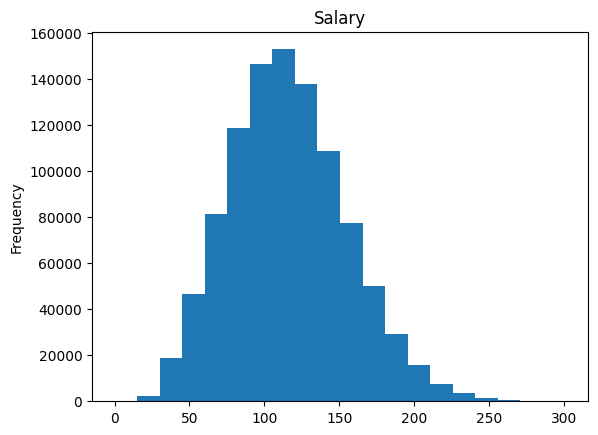

In [6]:
y['salary'].plot(kind='hist', bins=20, title='Salary')
print('Number of 0 salary values:', len(y[y['salary'] <= 1]))

5 rows of data with 0 salary. Remove rows in both features and outcomes training data sets

In [7]:
salary_0_jobIds = list(y[y['salary'] <= 1]['jobId'])
X = X[~X['jobId'].isin(salary_0_jobIds)]
y = y[~y['jobId'].isin(salary_0_jobIds)]
len(X), len(y)

(999995, 999995)

<Axes: title={'center': 'Experience'}, ylabel='Frequency'>

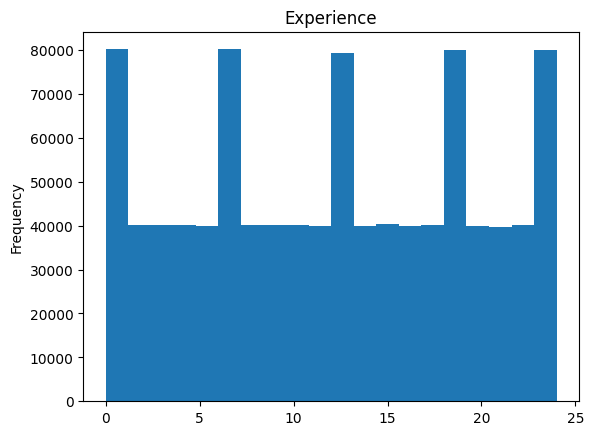

In [8]:
X['yearsExperience'].plot(kind='hist', bins=20, title='Experience')

<Axes: title={'center': 'Distance from Metro'}, ylabel='Frequency'>

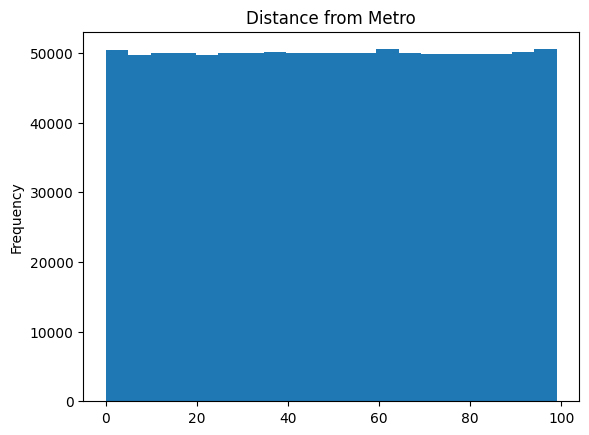

In [9]:
X['milesFromMetropolis'].plot(kind='hist', bins=20, title='Distance from Metro')

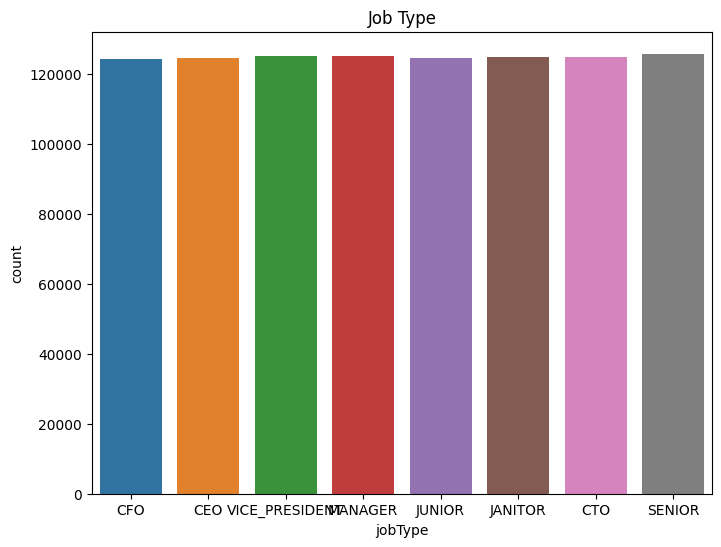

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x='jobType', data=X)
plt.title('Job Type')
plt.show()

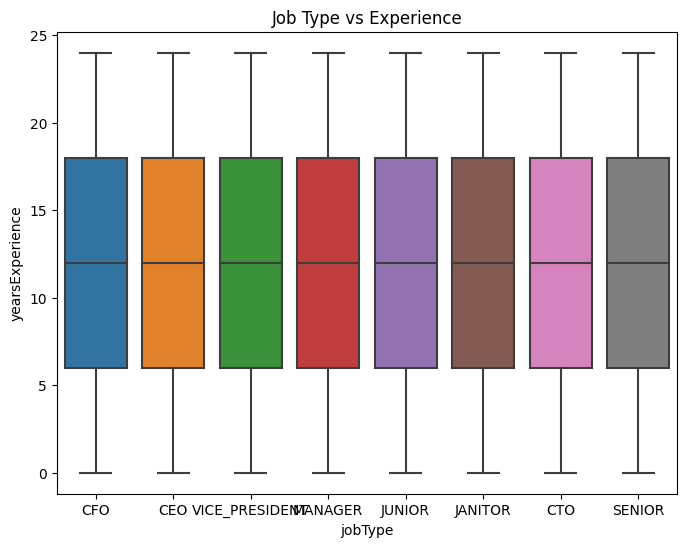

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='jobType', y='yearsExperience', data=X)
plt.title('Job Type vs Experience')
plt.show()

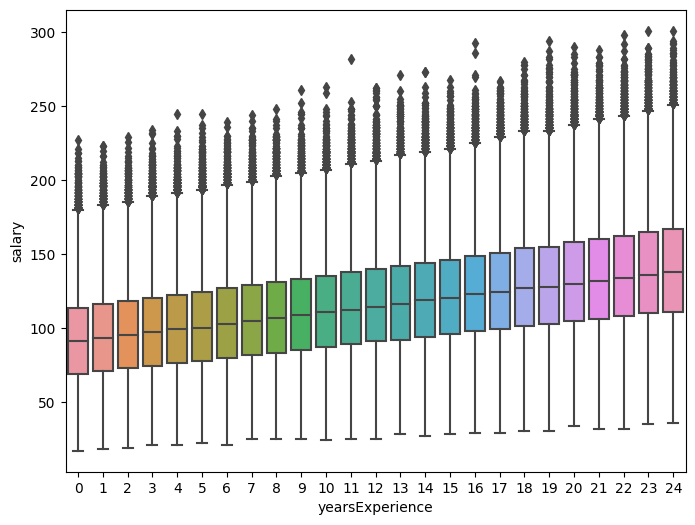

In [ ]:
merged_train = pd.merge(X, y, on='jobId')
plt.figure(figsize=(8,6))
sns.boxplot(x='yearsExperience', y='salary', data=merged_train)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


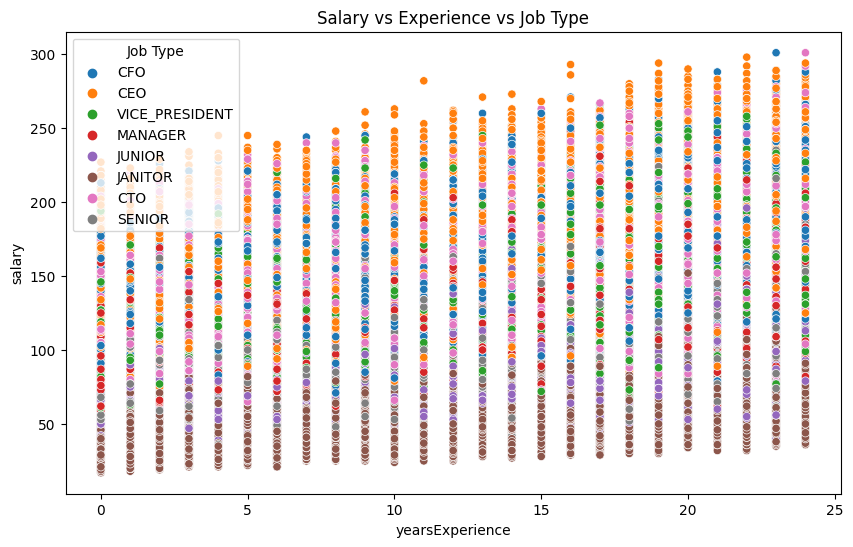

In [ ]:
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(data=merged_train, x='yearsExperience', y='salary', hue='jobType')
# scatter = sns.scatterplot(data=merged_train, x='yearsExperience', y='salary', hue='jobType', size='salary', sizes=(20,300), legend='full')
scatter.set_title('Salary vs Experience vs Job Type')
plt.legend(title='Job Type')
plt.show()

## Data prep
Do we need to do any encoding or transformations?
Most likely not if we are using decision trees or boosting algorithms

In [11]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

data_set = pd.merge(X, y, on='jobId')
feature_data = data_set[['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']]
value_data = data_set[['salary']]

label_encoder = LabelEncoder()
feature_data['degree'] = label_encoder.fit_transform(feature_data['degree'])

target_encoder = ce.TargetEncoder()
feature_data['companyId'] = target_encoder.fit_transform(feature_data['companyId'], value_data['salary'])

feature_data = pd.get_dummies(feature_data, columns=['jobType', 'major', 'industry'])

<ipython-input-11-87058c79f842>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data['degree'] = label_encoder.fit_transform(feature_data['degree'])
<ipython-input-11-87058c79f842>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data['companyId'] = target_encoder.fit_transform(feature_data['companyId'], value_data['salary'])


In [13]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(feature_data, value_data, test_size=0.2, random_state=42, shuffle=True)
X_train.shape, y_train.shape, data_set.shape

((799996, 28), (799996, 1), (999995, 9))

## Modeling
### 1. Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

<ipython-input-15-58e63aa92f62>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


KeyboardInterrupt: ignored

## Model Evaluation
MSE and MAE

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = rf.predict(X_test)

#Calcualte metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2s = r2_score(y_test, y_pred)

print(f"Mean squared Error: {mse}")
print(f"Mean absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2s}")

Mean squared Error: 404.49943268233045
Mean absolute Error: 16.133588034368742
Root Mean Squared Error: 20.112171257284242
R2 Score: 0.7287985953466585


## Feature Importance
Advantage of Random Forest is that it can provide insights into feature importance

Text(0.5, 1.0, 'Feature Importances')

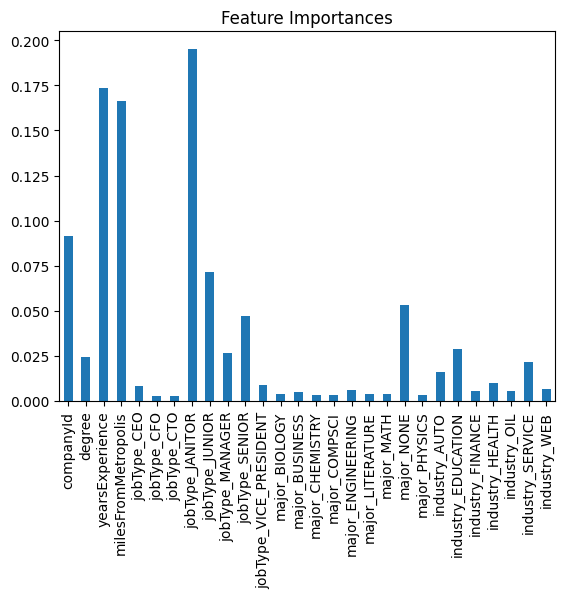

In [ ]:
importances = rf.feature_importances_
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature Importances")

## 2. CatBoost
CatBoost handles categorical features very well, often without the need for explicit prior encoding

In [16]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.3 MB/s eta 0:00:00


In [ ]:
feature_data.head()

,companyId,degree,yearsExperience,milesFromMetropolis,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,115.345049,3,10,83,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,115.756548,2,3,73,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,116.224249,1,10,38,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,116.199380,1,8,17,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,115.888501,0,8,16,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [17]:

categorical_features = ['companyId', 'jobType', 'degree', 'major', 'industry']
data_set[categorical_features] = data_set[categorical_features].astype(str)

X = data_set.drop(['jobId','salary'], axis=1)
y = data_set['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head(), y_train.head()

(       companyId  jobType    degree        major   industry  yearsExperience  \
 784381    COMP23      CTO  DOCTORAL      PHYSICS        WEB                5   
 851085     COMP9   SENIOR   MASTERS      COMPSCI        OIL               21   
 90029     COMP48      CTO      NONE         NONE        OIL               20   
 962495     COMP7      CFO  DOCTORAL      PHYSICS  EDUCATION               24   
 657606    COMP37  MANAGER  DOCTORAL  ENGINEERING       AUTO               22   
 
         milesFromMetropolis  
 784381                   94  
 851085                   26  
 90029                    83  
 962495                   71  
 657606                   51  ,
 784381    156
 851085    180
 90029     136
 962495    145
 657606    159
 Name: salary, dtype: int64)

### Training the CatBoost model
Import CatBoostRegressor and train your model. Specify the categorical features in your model.

In [ ]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=10,
    cat_features=categorical_features,
    random_seed=42,
    verbose=100,
    early_stopping_rounds=300
)

catboost_model.fit(X_train, y_train)

0:	learn: 36.1393500	total: 1.63s	remaining: 27m 7s
100:	learn: 18.8267081	total: 2m 23s	remaining: 21m 19s
200:	learn: 18.7532926	total: 4m 41s	remaining: 18m 37s
300:	learn: 18.6937642	total: 7m 2s	remaining: 16m 21s
400:	learn: 18.6298182	total: 9m 29s	remaining: 14m 10s
500:	learn: 18.5674643	total: 11m 59s	remaining: 11m 57s
600:	learn: 18.5031556	total: 14m 31s	remaining: 9m 38s
700:	learn: 18.4406764	total: 17m 4s	remaining: 7m 17s
800:	learn: 18.3831576	total: 19m 45s	remaining: 4m 54s
900:	learn: 18.3248161	total: 22m 26s	remaining: 2m 27s
999:	learn: 18.2624682	total: 25m 9s	remaining: 0us


In [ ]:
y_pred = catboost_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 18.824361183907524


# Grid Search for Hyperparameter tuning


In [19]:
from sklearn.model_selection import GridSearchCV
from catboost import Pool, CatBoost, CatBoostRegressor

params = {
    'iterations': [200, 500],
    'learning_rate': [0.1, 0.5],
    'depth': [6, 10],
    'early_stopping_rounds': [200, 500],
    # 'cat_features': [categorical_features]
}

# train_pool = Pool(X_train, y_train, cat_features=categorical_features)
# test_pool = Pool(X_test, cat_features=categorical_features)
# cat_gscv = CatBoostRegressor(random_seed=42, silent=True)
# model = CatBoost()
model = CatBoostRegressor(
    # iterations=1000,
    # learning_rate=0.1,
    # depth=10,
    cat_features=categorical_features,
    random_seed=42,
    verbose=100,
    # early_stopping_rounds=300
)
grid_search = model.grid_search(param_grid=params,
                                   X=X_train,
                                   y=y_train,
                                   plot=True)

# grid_search.fit(train_pool)

# print(grid_search.best_params_)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 110.7303451	test: 110.8104520	best: 110.8104520 (0)	total: 617ms	remaining: 2m 2s
100:	learn: 18.9267216	test: 18.9303700	best: 18.9303700 (100)	total: 41.9s	remaining: 41.1s
199:	learn: 18.8506199	test: 18.8716531	best: 18.8716531 (199)	total: 1m 19s	remaining: 0us

bestTest = 18.87165314
bestIteration = 199

0:	loss: 18.8716531	best: 18.8716531 (0)	total: 1m 19s	remaining: 19m 51s
0:	learn: 65.5191071	test: 65.5827930	best: 65.5827930 (0)	total: 474ms	remaining: 1m 34s
100:	learn: 18.8262773	test: 18.8685187	best: 18.8685182 (99)	total: 41.6s	remaining: 40.8s
199:	learn: 18.7836349	test: 18.8662647	best: 18.8651042 (173)	total: 1m 22s	remaining: 0us

bestTest = 18.86510424
bestIteration = 173

1:	loss: 18.8651042	best: 18.8651042 (1)	total: 2m 41s	remaining: 18m 51s
0:	learn: 110.7303451	test: 110.8104520	best: 110.8104520 (0)	total: 480ms	remaining: 3m 59s
100:	learn: 18.9267216	test: 18.9303700	best: 18.9303700 (100)	total: 41.3s	remaining: 2m 43s
200:	learn: 18.8502037	t

In [21]:
print(grid_search)

{'params': {'depth': 6, 'od_wait': 200, 'iterations': 500, 'learning_rate': 0.1}, 'cv_results': defaultdict(<class 'list'>, {'iterations': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 